Lab 1: Data Visualization, Data Preprocessing, and Statistical Analysis

Advanced Big Data and Data Mining (MSCS-634-B01)

Karan Aryal

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Load the dataset
df = pd.read_csv('post_pandemic_remote_work_health_impact_2025.csv')

# Display the first few rows
print(df.head())

  Survey_Date  Age  Gender         Region               Industry  \
0  2025-06-01   27  Female           Asia  Professional Services   
1  2025-06-01   37  Female           Asia  Professional Services   
2  2025-06-01   32  Female         Africa              Education   
3  2025-06-01   40  Female         Europe              Education   
4  2025-06-01   30    Male  South America          Manufacturing   

           Job_Role Work_Arrangement  Hours_Per_Week Mental_Health_Status  \
0      Data Analyst           Onsite              64      Stress Disorder   
1      Data Analyst           Onsite              37      Stress Disorder   
2  Business Analyst           Onsite              36                 ADHD   
3      Data Analyst           Onsite              63                 ADHD   
4   DevOps Engineer           Hybrid              65                  NaN   

  Burnout_Level  Work_Life_Balance_Score     Physical_Health_Issues  \
0          High                        3   Shoulder Pain;

In [6]:
# Check for missing values
print(df.isnull().sum())


Survey_Date                  0
Age                          0
Gender                       0
Region                       0
Industry                     0
Job_Role                     0
Work_Arrangement             0
Hours_Per_Week               0
Mental_Health_Status       799
Burnout_Level                0
Work_Life_Balance_Score      0
Physical_Health_Issues     280
Social_Isolation_Score       0
Salary_Range                 0
dtype: int64


Text(0.5, 1.0, 'Scatter: Gender vs. Industry by Region')

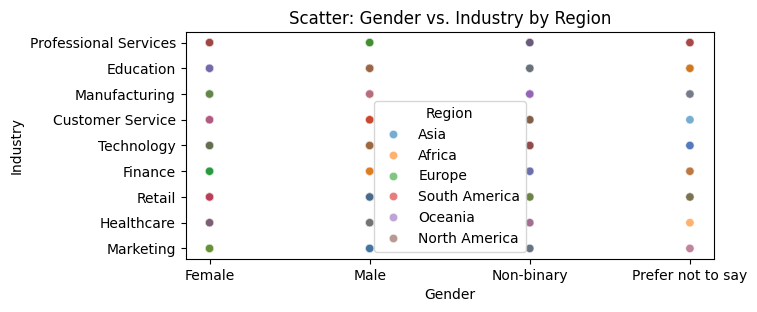

In [10]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.scatterplot(data=df, x='Gender', y='Industry', hue='Region', alpha=0.6)
plt.title('Scatter: Gender vs. Industry by Region')

Text(0.5, 1.0, 'Histogram: Fare Distribution')

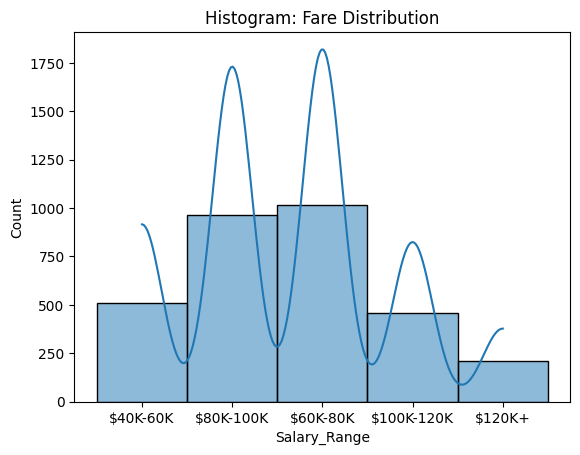

In [23]:
plt.subplot(1,1,1)
sns.histplot(data=df, x='Salary_Range', bins=30, kde=True)
plt.title('Histogram: Salary Range Distribution')

In [26]:
missing_info = df.isnull().sum()
missing_info = missing_info[missing_info > 0]
print(missing_info)


Mental_Health_Status      799
Physical_Health_Issues    280
dtype: int64


In [32]:
df['Mental_Health_Status'].fillna('Unknown', inplace=True)
df['Physical_Health_Issues'].fillna('Unknown', inplace=True)


In [33]:
missing_info = df.isnull().sum()
missing_info = missing_info[missing_info > 0]
print(missing_info)

Series([], dtype: int64)


In [34]:
# Drop rows with nulls in 'Social_Isolation_Score' or 'Work_Life_Balance_Score'
df_iqr = df[['Social_Isolation_Score', 'Work_Life_Balance_Score']].dropna()

# IQR for 'Social_Isolation_Score'
Q1 = df_iqr['Social_Isolation_Score'].quantile(0.25)
Q3 = df_iqr['Social_Isolation_Score'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers_iqr = df_iqr[(df_iqr['Social_Isolation_Score'] >= lower_bound) & (df_iqr['Social_Isolation_Score'] <= upper_bound)]

print(f"Original rows: {len(df_iqr)}, After IQR outlier removal: {len(df_no_outliers_iqr)}")


Original rows: 3157, After IQR outlier removal: 3157


In [36]:
print(df.shape)
sampled_df = df.sample(n=100, random_state=42)
print(sampled_df.shape)

(3157, 14)
(100, 14)


In [37]:
reduced_df = sampled_df.drop(columns=['Work_Arrangement', 'Burnout_Level', ])
print(reduced_df.columns)

Index(['Survey_Date', 'Age', 'Gender', 'Region', 'Industry', 'Job_Role',
       'Hours_Per_Week', 'Mental_Health_Status', 'Work_Life_Balance_Score',
       'Physical_Health_Issues', 'Social_Isolation_Score', 'Salary_Range'],
      dtype='object')


In [48]:
scaler = MinMaxScaler()
df['Hours_Per_Week_minmax'] = scaler.fit_transform(df[['Hours_Per_Week']])
df['Age_minmax'] = scaler.fit_transform(df[['Age']])

print(df['Hours_Per_Week_minmax'])
print(df['Age_minmax'])

0       0.966667
1       0.066667
2       0.033333
3       0.933333
4       1.000000
          ...   
3152    0.100000
3153    0.633333
3154    0.800000
3155    0.566667
3156    0.133333
Name: Hours_Per_Week_minmax, Length: 3157, dtype: float64
0       0.116279
1       0.348837
2       0.232558
3       0.418605
4       0.186047
          ...   
3152    0.930233
3153    0.046512
3154    0.534884
3155    0.372093
3156    0.744186
Name: Age_minmax, Length: 3157, dtype: float64


In [53]:
df['Age_bins'] = pd.cut(df['Age'], bins=4, labels=['Low', 'Mid', 'High', 'Very High'])
print(df['Age_bins'])

0             Low
1             Mid
2             Low
3             Mid
4             Low
          ...    
3152    Very High
3153          Low
3154         High
3155          Mid
3156         High
Name: Age_bins, Length: 3157, dtype: category
Categories (4, object): ['Low' < 'Mid' < 'High' < 'Very High']


In [54]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Survey_Date              3157 non-null   object  
 1   Age                      3157 non-null   int64   
 2   Gender                   3157 non-null   object  
 3   Region                   3157 non-null   object  
 4   Industry                 3157 non-null   object  
 5   Job_Role                 3157 non-null   object  
 6   Work_Arrangement         3157 non-null   object  
 7   Hours_Per_Week           3157 non-null   int64   
 8   Mental_Health_Status     2358 non-null   object  
 9   Burnout_Level            3157 non-null   object  
 10  Work_Life_Balance_Score  3157 non-null   int64   
 11  Physical_Health_Issues   2877 non-null   object  
 12  Social_Isolation_Score   3157 non-null   int64   
 13  Salary_Range             3157 non-null   object  
 14  Hours_Pe

In [55]:
print(df.describe())

               Age  Hours_Per_Week  Work_Life_Balance_Score  \
count  3157.000000     3157.000000              3157.000000   
mean     43.732024       49.904973                 2.996516   
std      12.661095        8.897699                 1.163307   
min      22.000000       35.000000                 1.000000   
25%      33.000000       42.000000                 2.000000   
50%      44.000000       50.000000                 3.000000   
75%      55.000000       57.000000                 4.000000   
max      65.000000       65.000000                 5.000000   

       Social_Isolation_Score  Hours_Per_Week_minmax   Age_minmax  
count             3157.000000            3157.000000  3157.000000  
mean                 2.704783               0.496832     0.505396  
std                  1.188887               0.296590     0.294444  
min                  1.000000               0.000000     0.000000  
25%                  2.000000               0.233333     0.255814  
50%                  3.0

In [62]:
mean_hours_per_week = df['Hours_Per_Week'].mean()
mode_hours_per_week = df['Hours_Per_Week'].mode()
median_hours_per_week = df['Hours_Per_Week'].median()
max_hours_per_week = df['Hours_Per_Week'].max()
min_hours_per_week = df['Hours_Per_Week'].min()

In [64]:
print("Hours per week:")
print("Mean hours per week:", mean_hours_per_week)
print("Median hours per week:", median_hours_per_week)
print("Max hours per week:", max_hours_per_week)
print("Min hours per week:", min_hours_per_week)
print("Mode hours per week:", mode_hours_per_week)

Hours per week:
Mean hours per week: 49.90497307570478
Median hours per week: 50.0
Max hours per week: 65
Min hours per week: 35
Mode hours per week: 0    45
Name: Hours_Per_Week, dtype: int64


In [67]:
range_age = df['Age'].max() - df['Age'].min()
age_q1 = df['Age'].quantile(0.25)
age_q2 = df['Age'].quantile(0.50)
age_q3 = df['Age'].quantile(0.75)
iqr_age = age_q3 - age_q1
var_age = df['Age'].var()
std_age = df['Age'].std()

print("AGE")
print(f"Range: {range_age:.2f}")
print(f"Q1: {age_q1}, Q2 (Median): {age_q2}, Q3: {age_q3}")
print(f"IQR: {iqr_age}")
print(f"Variance: {var_age:.2f}")
print(f"Standard Deviation: {std_age:.2f}")


AGE
Range: 43.00
Q1: 33.0, Q2 (Median): 44.0, Q3: 55.0
IQR: 22.0
Variance: 160.30
Standard Deviation: 12.66


                              Age  Hours_Per_Week  Work_Life_Balance_Score  \
Age                      1.000000        0.003748                -0.022523   
Hours_Per_Week           0.003748        1.000000                -0.014879   
Work_Life_Balance_Score -0.022523       -0.014879                 1.000000   
Social_Isolation_Score  -0.003005       -0.003941                -0.004639   
Hours_Per_Week_minmax    0.003748        1.000000                -0.014879   
Age_minmax               1.000000        0.003748                -0.022523   

                         Social_Isolation_Score  Hours_Per_Week_minmax  \
Age                                   -0.003005               0.003748   
Hours_Per_Week                        -0.003941               1.000000   
Work_Life_Balance_Score               -0.004639              -0.014879   
Social_Isolation_Score                 1.000000              -0.003941   
Hours_Per_Week_minmax                 -0.003941               1.000000   
Age_minma

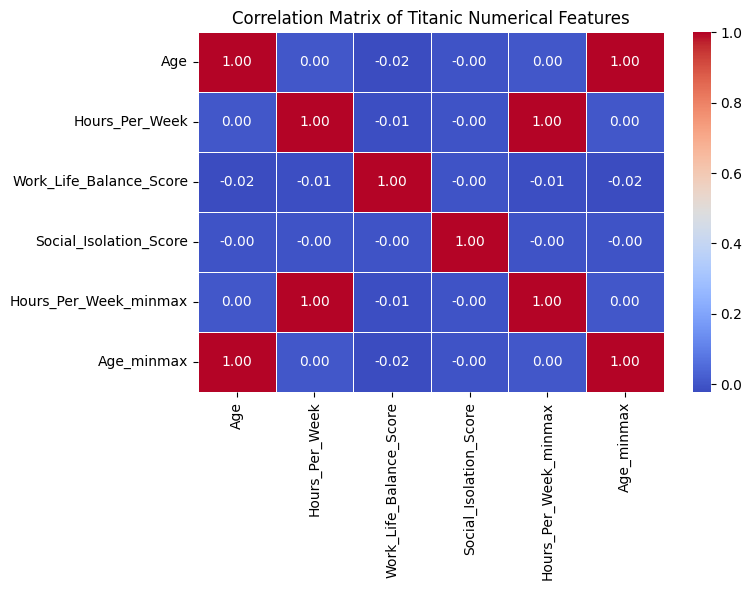

In [70]:
numeric_df = df.select_dtypes(include='number')
numeric_df = numeric_df.dropna()
corr_matrix = numeric_df.corr()
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Titanic Numerical Features")
plt.tight_layout()
plt.show()